(70, 4)
(70, 4)


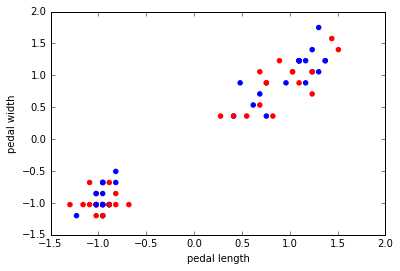

In [3]:
%matplotlib inline
import csv
import random
import matplotlib.pyplot as plt
import numpy.matlib as mat
#%pylab
import numpy as np
import struct
from array import array as pyarray
features = []
names = []
test_features = []
test_names = []
with open('/Users/marshuang/CSE190/iris/iris_train.data', newline= '') as csvfile:
    irisReader = csv.reader(csvfile,delimiter = ',',quotechar='|')
    for row in irisReader:
        if not(row ==[]):
            features.append(row[:-1])
            names.append(row[4])
with open('/Users/marshuang/CSE190/iris/iris_test.data', newline= '') as csvfile:
    irisReader = csv.reader(csvfile,delimiter = ',',quotechar='|')
    for row in irisReader:
        if not(row ==[]):
            test_features.append(row[:-1])
            test_names.append(row[4])
ITF = np.array(features).astype(np.float)
ITN = np.array(names)
test_ITF = np.array(test_features).astype(np.float)
test_ITN = np.array(test_names)
mean = (ITF.mean(axis=0))
std = (ITF.std(axis=0))
test_mean = (test_ITF.mean(axis=0))
test_std = (test_ITF.std(axis=0))


# Number 1a

# bias for data 
z_bias = np.ones(70)
testZ_bias = np.ones(30)
# z0 = []
# z1 = []
# z2 = []
# z3 = []
# for i in ITF[:,0]:
#     z0.append((i-mean[0])/std[0])
# for j in ITF[:,1]:
#     z1.append((j-mean[1])/std[1])
# for k in ITF[:,2]:
#     z2.append((k-mean[2])/std[2])
# for l in ITF[:,3]:
#     z3.append((l-mean[3])/std[3])
#trainZ = np.column_stack((z_bias,z0,z1,z2,z3))


# z score for training data
row, size = np.shape(ITF)
mean_list = [np.mean(ITF[:, i]) for i in range(size)]
std_list = [np.std(ITF[:, i]) for i in range(size)]
mean_matrix = mat.repmat(mean_list, row, 1)
std_matrix = mat.repmat(std_list, row, 1)
trainZ = (ITF - mean_matrix)/std_matrix
trainZ = np.insert(trainZ,0,z_bias,1)

print(ITF.shape)
print(mean_matrix.shape)


# z score for test data
testRow, testSize = np.shape(test_ITF)
testStd_list = [np.std(ITF[:, i]) for i in range(testSize)]
testMean_list = [np.mean(ITF[:, i]) for i in range(testSize)]
testMean_matrix = mat.repmat(mean_list, testRow, 1)
testStd_matrix = mat.repmat(std_list, testRow, 1)
testZ = (test_ITF - testMean_matrix)/testStd_matrix
testZ = np.insert(testZ,0,testZ_bias,1)


# Number 1b
#plt.scatter(trainZ[:,1],trainZ[:,2], color = ["red","blue"])
#plt.scatter(trainZ[:,1],trainZ[:,3], color = ["red","blue"])
#plt.scatter(trainZ[:,1],trainZ[:,4], color = ["red","blue"])
#plt.scatter(trainZ[:,2],trainZ[:,3], color = ["red","blue"])
#plt.scatter(trainZ[:,2],trainZ[:,4], color = ["red","blue"])
plt.scatter(trainZ[:,3],trainZ[:,4], color = ["red","blue"])
plt.xlabel('pedal length')
plt.ylabel('pedal width')



train_names = [1 if i=='Iris-setosa' else 0 for i in ITN]
test_names = [ 1 if i =='Iris-setosa' else 0 for i in test_ITN]

        

1.0


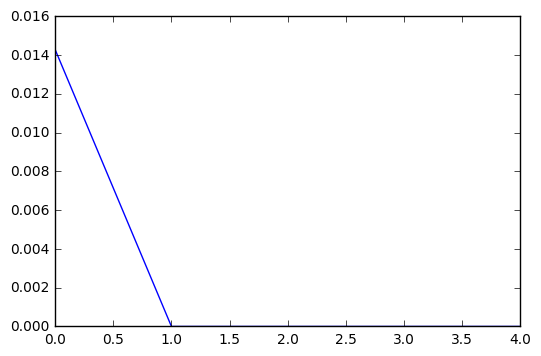

In [9]:
# 1c Training Perceptron
w = [0,0,0,0,0]
#np.random.uniform(-1,1)
#w = np.random.rand(5)*2-1
a = 0.001
error_array = []
rounds = 5
train_shuffle = np.random.permutation(70)
for i in range(rounds):
    error_num = 0 
    for j in train_shuffle:
        output = 0
        error = np.dot(trainZ[j,:],w)
        if error >= 0: 
            output = 1
        w = w + a*(train_names[j]-output)*trainZ[j,:]
        if (train_names[j]-output) != 0:
            error_num += 1
    error_array.append(float(error_num)/70.0)
plt.plot(error_array)


# 1d Testing Perceptron 
correct = 0
for j in range(testZ.shape[0]):
    output = 0
    act = np.dot(testZ[j,:],w)
    if act >= 0:
        output = 1
    if (test_names[j] == output):
        correct += 1
print(correct/30)



In [4]:
#number 2
train_file = open("train-images-idx3-ubyte.gz",'rb')
magic_num , size, rows, cols = struct.unpack(">IIII",train_file.read(16))
img = pyarray("B",train_file.read())
train_file.close()

train_data = np.zeros((100,rows,cols),dtype=np.uint8)
for i in range(N):
    images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
    
print(images.shape)

MemoryError: 